# Perceptron

A perceptron with two inputs and one output is given by

$$ y = \sigma(-4.79x_1 + 5.90x_2 - 0.93) $$

For the inputs defined in the domain $[-2, 2] \times [-2, 2]$, plot the output surface $y$ as a function of $x1, x2$, when the activation function is (a) sigmoid (b) Hard limit and (c) Radial basis function.
Plot the function with $100$, $5{,}000$, $10{,}000$ sample points from the domain.


In [1]:
import numpy as np
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Define the perceptron's parameters
w1 = -4.79
w2 = 5.90
b = -0.93

# Define the input domain
domain_min = -2
domain_max = 2

# Define the sample sizes for plotting
sample_sizes = [100, 5000, 10000]

In [3]:
# Activation Functions
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))


def hard_limit(z):
    """Hard limit activation function."""
    # Returns 1 if z >= 0, else 0.
    return (z >= 0).astype(int)


def gaussian_rbf(z, sigma_rbf=5.0):
    """
    Gaussian Radial Basis Function as an activation function.

    This function applies a Gaussian shape to the scalar linear combination 'z'.
    It assumes a center (mu) of 0.
    The 'sigma_rbf' parameter controls the width of the Gaussian.
    A larger sigma_rbf makes the Gaussian wider.
    """
    return np.exp(-(z**2) / (2 * sigma_rbf**2))


# Dictionary of activation functions
activation_functions = {
    "Sigmoid": sigmoid,
    "Hard Limit": hard_limit,
    "Gaussian RBF": gaussian_rbf,
}

In [4]:
def get_grid_dimensions(N_total):
    """
    Finds two integers nx, ny such that nx * ny = N_total,
    and nx, ny are as close to each other as possible.
    This ensures the total number of points is exactly N_total.
    """
    if N_total <= 0:
        raise ValueError("N_total must be positive")

    if N_total == 1:
        return 1, 1

    sqrt_N = int(np.sqrt(N_total))

    # Iterate downwards from sqrt_N to find the largest factor
    # This ensures nx is as close to ny as possible (nx <= ny)
    for i in range(sqrt_N, 0, -1):
        if N_total % i == 0:
            return i, N_total // i

    # This case should theoretically not be reached for N_total > 1,
    # as 1 is always a factor.
    return N_total, 1  # Fallback, e.g., for prime numbers, though 1 is always a factor.

In [5]:
for act_name, act_func in activation_functions.items():
    for N_samples in sample_sizes:
        # Use the new helper function to get exact dimensions
        # For N_samples=100 -> (10, 10)
        # For N_samples=5000 -> (50, 100)
        # For N_samples=10000 -> (100, 100)
        num_points_x, num_points_y = get_grid_dimensions(N_samples)

        # Generate grid points for x1 and x2
        # x1_vals will have num_points_x points
        # x2_vals will have num_points_y points
        x1_vals = np.linspace(domain_min, domain_max, num_points_x)
        x2_vals = np.linspace(domain_min, domain_max, num_points_y)
        X1, X2 = np.meshgrid(x1_vals, x2_vals)  # Create a meshgrid for 3D plotting

        # Calculate the linear combination (z) for all grid points
        # Follows the perceptron equation: z = w1*x1 + w2*x2 + b
        Z = w1 * X1 + w2 * X2 + b

        # Apply the activation function to get the output y
        Y = act_func(Z)

        # Create a Plotly figure
        fig = go.Figure(data=[go.Surface(x=X1, y=X2, z=Y, colorscale="Viridis")])

        # Update layout for title and axis labels/limits
        fig.update_layout(
            title_text=f"Output Surface: {act_name} Activation ({N_samples} points)",
            scene=dict(
                xaxis_title=r"$x_1$",
                yaxis_title=r"$x_2$",
                zaxis_title=r"$y$",
                zaxis_range=[0, 1],  # Consistent z-axis limits for better comparison
            ),
            # Adjust figure size
            height=700,
            width=900,
        )

        # Display the interactive plot
        fig.show()

**Manual Step**: `Plotly` creates interactive 3D plots. We manually save each figure with the best looking angles and save to the `outputs` directory.


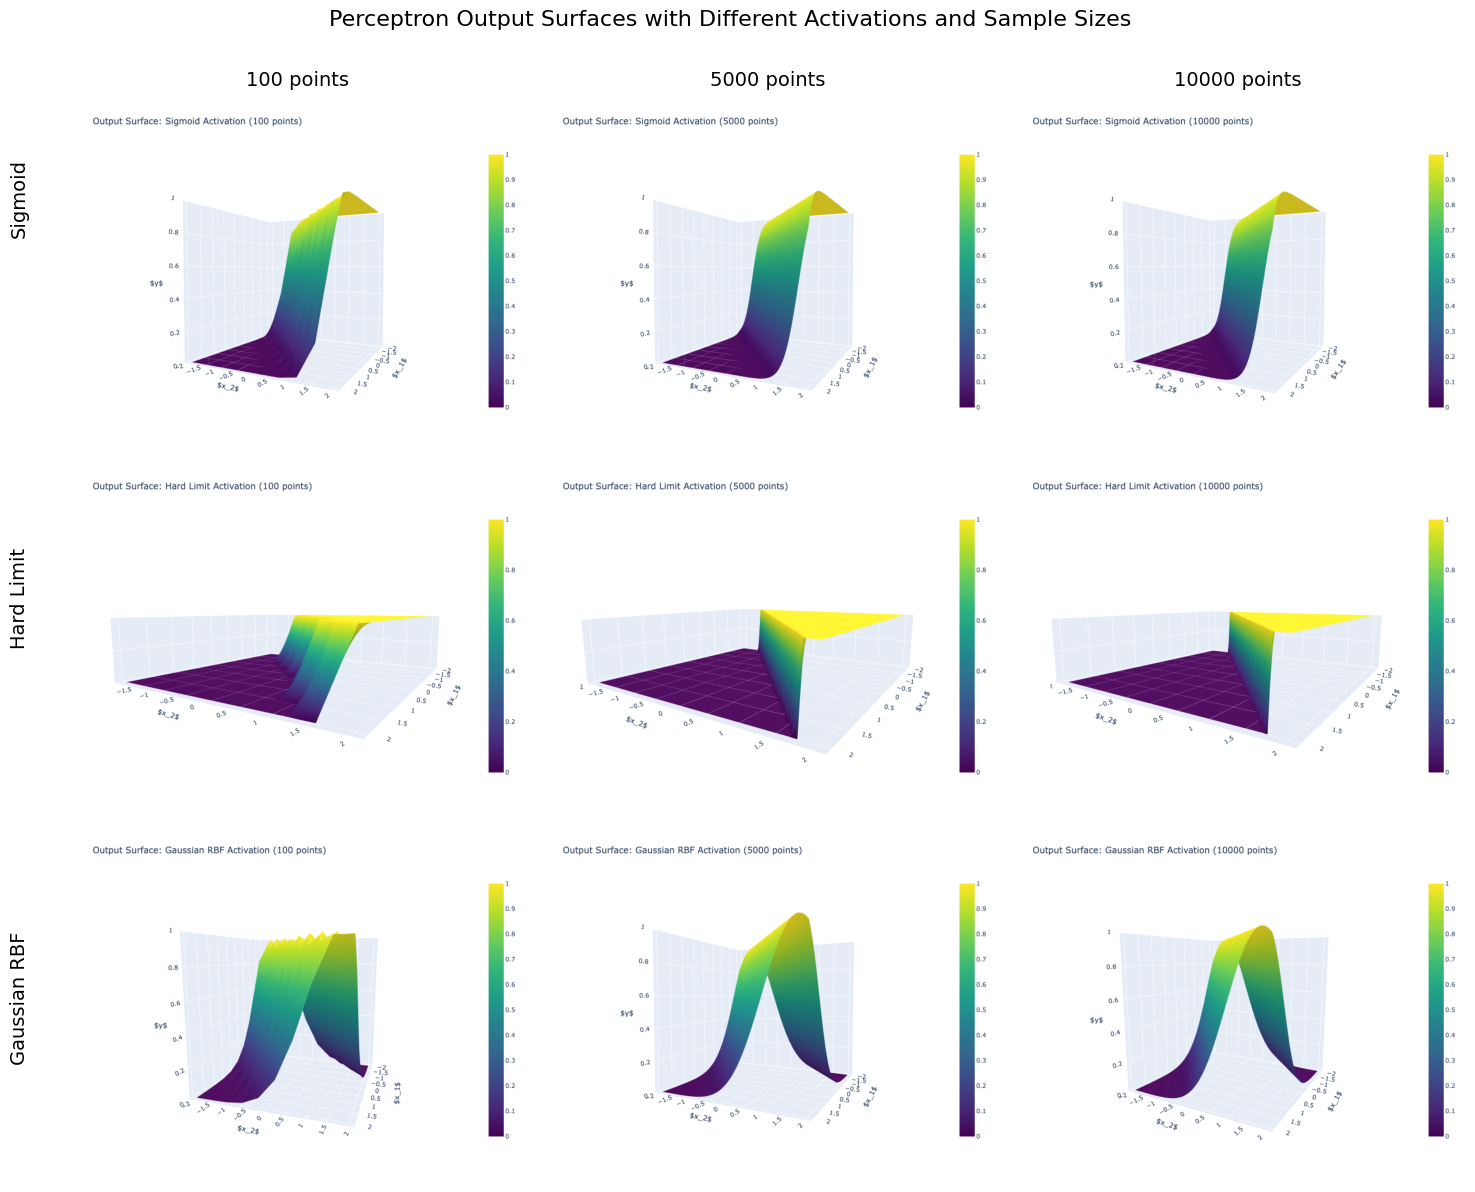

In [6]:
# Map filenames to display names
functions = {"sigmoid": "Sigmoid", "hard": "Hard Limit", "RBF": "Gaussian RBF"}
sample_sizes = [100, 5000, 10000]

# Create figure and axes grid
fig, axes = plt.subplots(
    nrows=len(functions), ncols=len(sample_sizes), figsize=(15, 12)
)

# Loop through functions and sample sizes
for i, (func_key, func_title) in enumerate(functions.items()):
    for j, n in enumerate(sample_sizes):
        ax = axes[i, j]

        # Load image
        img = mpimg.imread(f"outputs/percep_{func_key}_{n}.png")
        ax.imshow(img)
        ax.axis("off")

        # Add column titles (top row only)
        if i == 0:
            ax.set_title(f"{n} points", fontsize=14, pad=10)

    # Place row label on the far left margin, centered for this row
    # 0.02 moves the label into the margin, adjust if needed
    fig.text(
        0.02,  # x-position (left margin)
        (len(functions) - i - 0.5) / len(functions),  # y-position centered for row
        func_title,
        va="center",
        ha="left",
        rotation=90,
        fontsize=14,
    )

# Adjust layout
plt.tight_layout(rect=[0.05, 0, 1, 0.95])  # leave space for labels + title

# Main title
fig.suptitle(
    "Perceptron Output Surfaces with Different Activations and Sample Sizes",
    fontsize=16,
    y=0.99,
)

# Save combined figure
plt.savefig("outputs/percep_combined_figure.png", dpi=300, bbox_inches="tight")
plt.show()
